##### Problem 1A:
Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.
 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]


In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# load the dataset

salary_data_df = pd.read_csv("SalaryData.csv")

In [4]:
# First 5 rows of the dataset

salary_data_df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [5]:
# Checking info
salary_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
# Description of the data
salary_data_df.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


##### Describe the data to check the min,max,mean,std deviation & the summary of numerical column

In [7]:
# Checking for Null
salary_data_df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [8]:
salary_data_df.skew()#negatively skewed(left-hand), normallity assumption not met

Salary   -0.173118
dtype: float64

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

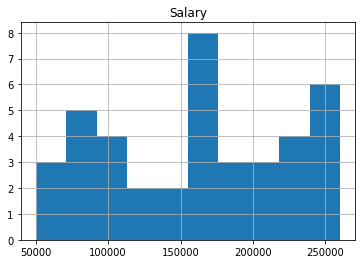

In [9]:
salary_data_df.hist()

In [10]:
salary_data_df.describe(include='all')

,Education,Occupation,Salary
count,40,40,40.000000
unique,3,4,NaN
top,Doctorate,Prof-specialty,NaN
freq,16,13,NaN
mean,NaN,NaN,162186.875000
std,NaN,NaN,64860.407506
min,NaN,NaN,50103.000000
25%,NaN,NaN,99897.500000
50%,NaN,NaN,169100.000000
75%,NaN,NaN,214440.750000


##### 1.	State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

##### Hypothesis for One way ANOVA Test For Education: 

    𝐻0 : The means of 'Education' variable with respect to each Salary is equal.
    
    𝐻1 : At least one of the means of 'Education' variable with respect to each Salary is unequal.


##### Hypothesis for One way ANOVA Test For Occupation:

    𝐻0 : The means of 'Occupation' variable with respect to each Salary is equal.
    
    𝐻1 : At least one of the means of 'Occupation' variable with respect to each Salary is unequal.

Before doing ANOVA test , we check for below assumptions:
    
    1. Independence
    
    2. Normality (assumed normal in question), Or else will do Shapiro Test .
       We get pvalue as 0.035 which is less than significance level of 0.05, means normally distributed.
        
       If the p-value is less than 0.05, We will conclude that the null hypothesis should be rejected. This implies that 
       there is a significant difference between the mean of different levels of variables under consideration.

       If there is a need for pairwise comparison in further analysis then you should use a t-test of independence.

##### 2.	Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

##### One-way ANOVA of 'Education' variable with the 'Salary' variable.


𝐻0 : The means of 'Education' variable with respect to each Salary is equal.

𝐻1 : At least one of the means of 'Education' variable with respect to each Salary is unequal.

In [11]:
salary_data_df.Education = pd.Categorical(salary_data_df.Education)

salary_data_df.Occupation = pd.Categorical(salary_data_df.Occupation)

In [12]:
salary_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 824.0 bytes


In [13]:
formula = ' C(Education) ~  Salary'
'Salary ~ C(Education)'

'Salary ~ C(Education)'

In [14]:
formula = 'Salary ~ Education' #step 1
model = ols(formula, salary_data_df).fit()#step 2
aov_table = anova_lm(model)#step 3
print(aov_table)

             df        sum_sq       mean_sq         F        PR(>F)
Education   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual   37.0  6.137256e+10  1.658718e+09       NaN           NaN


##### Since the p value in this scenario is less than 𝛼 (0.05), we can reject the Null Hypothesis (𝐻0) & conclude that there is a difference in the means of ‘Education’ variable w.r.t Salary is unequal.

##### 3.	Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

𝐻0 : The means of 'Occupation' variable with respect to each Salary is equal.

𝐻1 : At least one of the means of 'Occupation' variable with respect to each Salary is unequal.

In [15]:
formula = ' C(Occupation) ~  Salary'# error
'Salary ~ C(Occupation)'

'Salary ~ C(Occupation)'

In [16]:
formula = 'Salary ~ Occupation' #step 1
model = ols(formula, salary_data_df).fit()#step 2
aov_table = anova_lm(model)#step 3
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
Occupation   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual    36.0  1.528092e+11  4.244701e+09       NaN       NaN


##### Since the p value in this scenario is greater than 𝛼 (0.05), we can say that we fail to reject the Null Hypothesis (𝐻0)

##### 4.	If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

effect = pairwise_tukeyhsd(endog = salary_data_df['Salary'], groups = salary_data_df['Education'], alpha = 0.05)
print(effect)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

effect = pairwise_tukeyhsd(endog = salary_data_df['Salary'], groups = salary_data_df['Occupation'], alpha = 0.05)
print(effect)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


##### The Null Hypothesis is rejected in the Scenario of Education. We can also check class mean are different due to difference in the group means of Tukeyshd() function in python.

##### Problem 1B:
1.	What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]




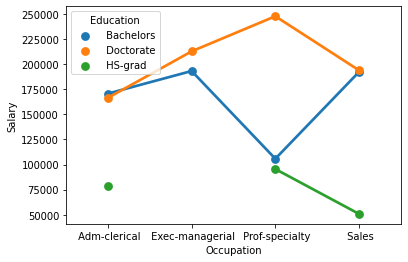

In [22]:
sns.pointplot(x='Occupation', y='Salary', data=salary_data_df, hue='Education',ci=None);

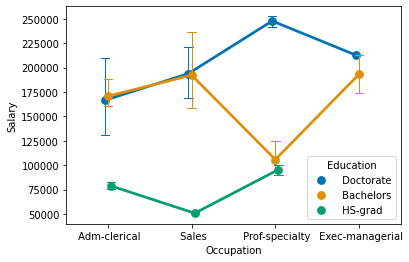

In [14]:
sns.pointplot(data=salary_data_df,
              x='Occupation',
              y='Salary',
              hue='Education',
              dodge=True,
              capsize=0.1,
              errwidth=1,
              palette='colorblind');

##### Inference
        From the above Interaction plots, there seems to be an interaction between the two Education & Occupation variables, i.e. (Docatorate & Bachelors- Education Variables) corresponds with (Adm-CLerical(very close) & Sales-Occupation Variable) wrt Salary. Other than these mentioned the rest of the values sees almost no interaction amongst the variables.

##### 1 B.	Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

       𝐻0: The means of 'Salary' variable with respect to each Education and Occupation is equal. Or we can say that Salary       depends on both categories - education and occupation
    
    𝐻1: At least one of the means of 'Salary' variable with respect to each Education and Occupation is unequal.
    
    Confidence level = 0.05

In [24]:
salary_data_df['Salary']= pd.to_numeric(salary_data_df['Salary'])

In [25]:
formula = 'Salary ~ C(Education) + C(Occupation)'#step 1
model = ols(formula, salary_data_df).fit()#step 2
aov_table = anova_lm(model)#step 3
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,31.257677,1.981539e-08
C(Occupation),3.0,5.519946e+09,1.839982e+09,1.120080,3.545825e-01
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


Considering both the factors , Education and Occupation, Education is a significant variable as the p value < 0.05, whereas Occupation is not a significant variable as p value of Occupation is > 0.05.

##### Interaction Effect

In [26]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'

model = ols(formula, salary_data_df).fit()

aov_table = anova_lm(model)

(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


##### By the Interaction Effect, Education:Occupation has become important, since we can see that there was interaction between those two variables. Thus, Interaction between the variables has now become important because interaction effect p-value is < 0.05

##### 3.	Explain the business implications of performing ANOVA for this particular case study.

By Performing an ANOVA test, we can see that Education is the major factor impacting the Salary across different Occupation.
However, while inetraction between (Education:Occupation), there are few observations that both has a slight interaction corresponding with Salary. The interaction between (Education:Occupation) is slightly important. But, Education is the significant predictor of the Salary.

### Problem 2:
The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.


##### 2.1 •	Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# load the dataset

education_df = pd.read_csv("Education+-+Post+12th+Standard.csv")

In [4]:
# Checking the first 5 rows

education_df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
# Checking info

education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

##### Checking its shape and data types of variable .

In [6]:
print('The dataset has {} rows and {} columns'.format(education_df.shape[0],education_df.shape[1]))


The dataset has 777 rows and 18 columns


In [7]:
# Datatypes
education_df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

    shape tell us how many rows and columns we have in the data and 
    data type tell us whether the variable is object,integer or float value.

In [8]:
education_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


##### Describe the data to check the min,max,mean,std deviation & the summary of numerical column

In [9]:
education_df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [10]:
#Check for presence of duplicate rows
education_df.duplicated().sum()

0

##### Missing Values was not found in the dataset as well as Duplicate rows were not found in the  dataset

In [11]:
education_df.skew()#negatively skewed(left-hand), normallity assumption not met

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

### Univariate Analysis

####    We use distplot or density plot to check the normality. Normality means whether the data is normally distributed or not.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

<AxesSubplot:xlabel='Top10perc'>

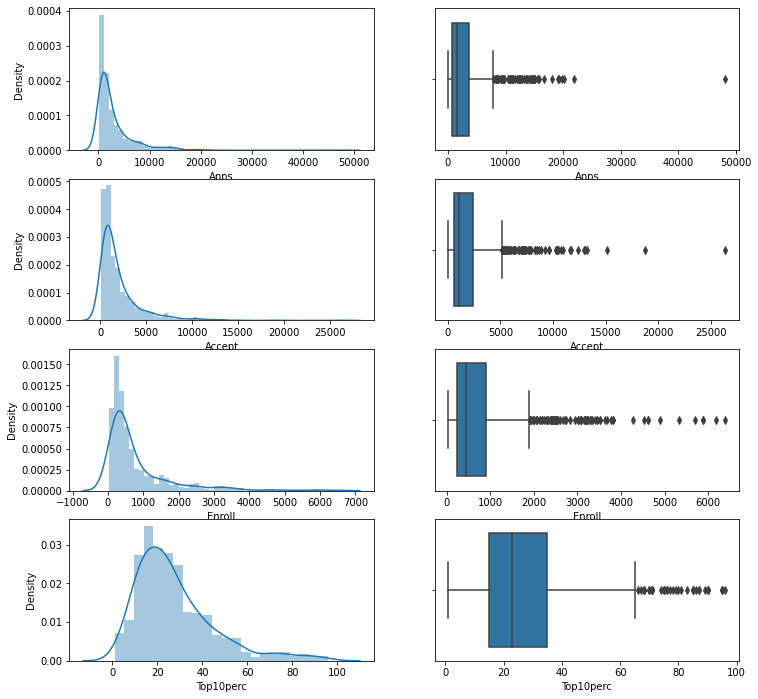

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=2)

fig.set_size_inches(12, 12)

sns.distplot(education_df['Apps'], ax=axes[0][0])
sns.boxplot(education_df['Apps'], orient='H', ax=axes[0][1])

sns.distplot(education_df['Accept'], ax=axes[1][0])
sns.boxplot(education_df['Accept'], orient='H', ax=axes[1][1] )

sns.distplot(education_df['Enroll'], ax=axes[2][0])
sns.boxplot(education_df['Enroll'], orient='H', ax=axes[2][1] )

sns.distplot(education_df['Top10perc'], ax=axes[3][0])
sns.boxplot(education_df['Top10perc'], orient='H', ax=axes[3][1] )

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

<AxesSubplot:xlabel='Outstate'>

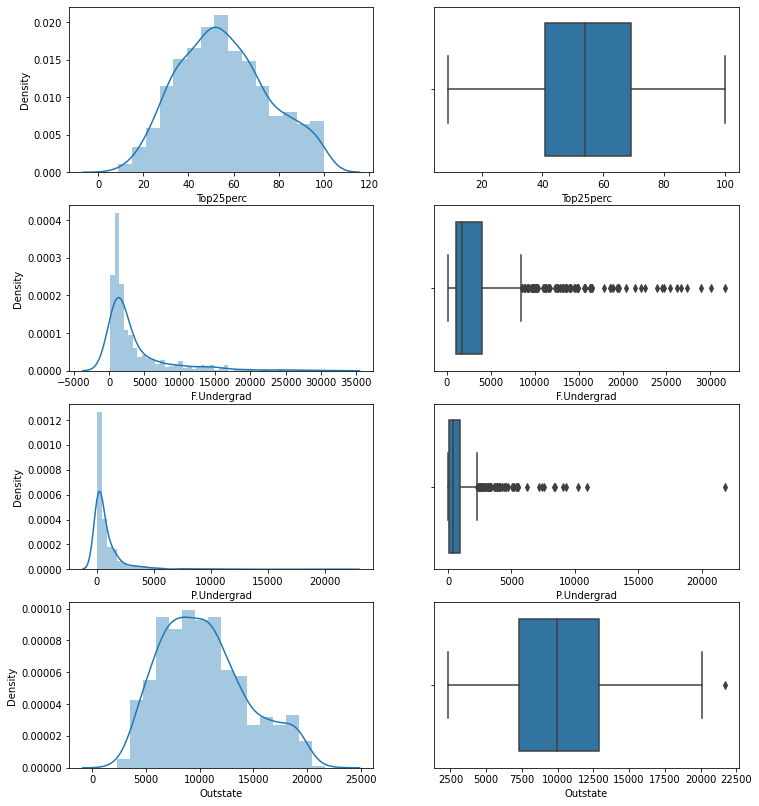

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=2)

fig.set_size_inches(12, 14)

sns.distplot(education_df['Top25perc'], ax=axes[0][0])
sns.boxplot(education_df['Top25perc'], orient='H', ax=axes[0][1])

sns.distplot(education_df['F.Undergrad'], ax=axes[1][0])
sns.boxplot(education_df['F.Undergrad'], orient='H', ax=axes[1][1] )

sns.distplot(education_df['P.Undergrad'], ax=axes[2][0])
sns.boxplot(education_df['P.Undergrad'], orient='H', ax=axes[2][1] )

sns.distplot(education_df['Outstate'], ax=axes[3][0])
sns.boxplot(education_df['Outstate'], orient='H', ax=axes[3][1] )

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

<AxesSubplot:xlabel='PhD'>

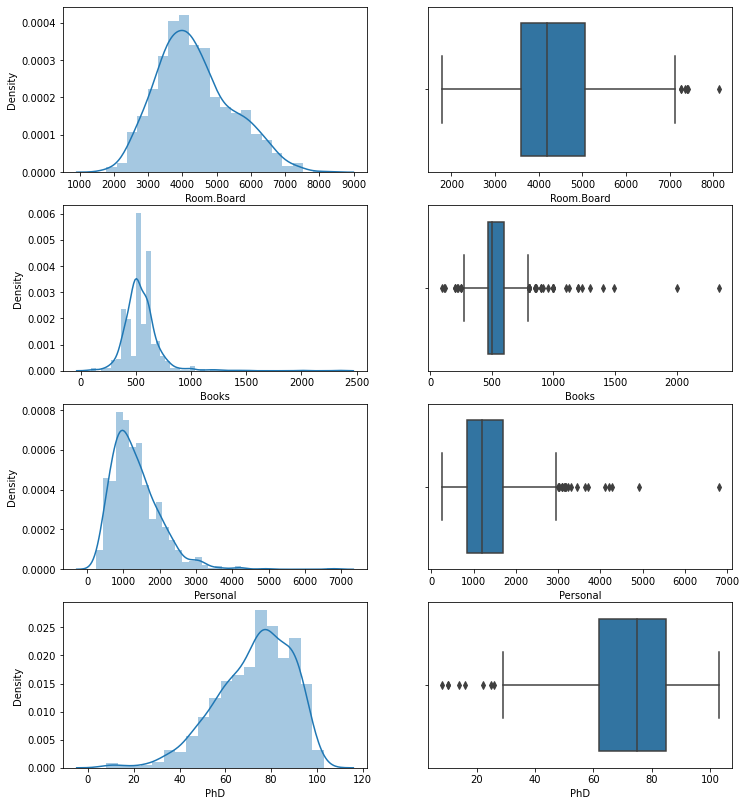

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=2)

fig.set_size_inches(12, 14)

sns.distplot(education_df['Room.Board'], ax=axes[0][0])
sns.boxplot(education_df['Room.Board'], orient='H', ax=axes[0][1])

sns.distplot(education_df['Books'], ax=axes[1][0])
sns.boxplot(education_df['Books'], orient='H', ax=axes[1][1] )

sns.distplot(education_df['Personal'], ax=axes[2][0])
sns.boxplot(education_df['Personal'], orient='H', ax=axes[2][1] )

sns.distplot(education_df['PhD'], ax=axes[3][0])
sns.boxplot(education_df['PhD'], orient='H', ax=axes[3][1] )

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

<AxesSubplot:xlabel='Grad.Rate'>

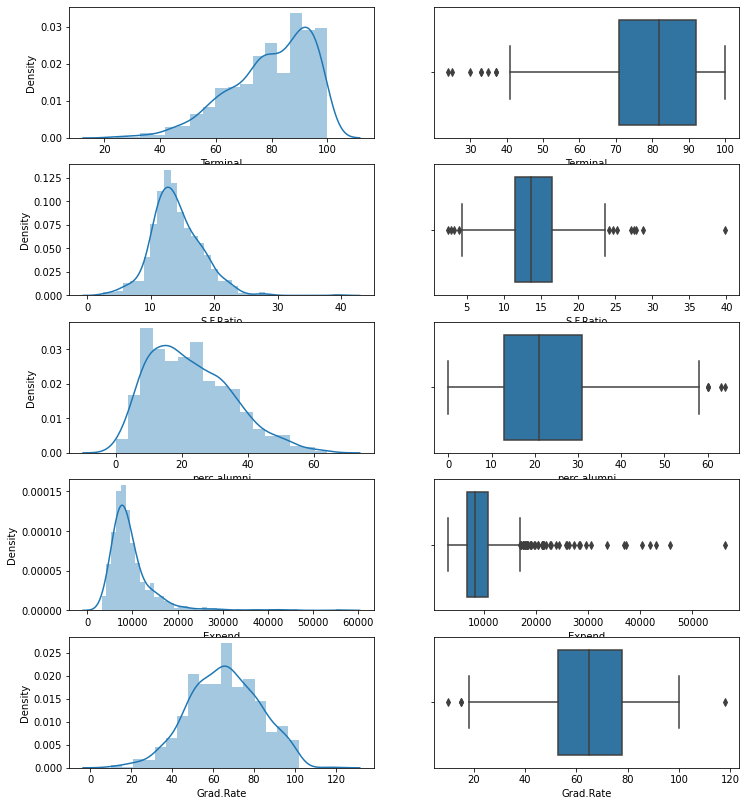

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=2)

fig.set_size_inches(12, 14)

sns.distplot(education_df['Terminal'], ax=axes[0][0])
sns.boxplot(education_df['Terminal'], orient='H', ax=axes[0][1])

sns.distplot(education_df['S.F.Ratio'], ax=axes[1][0])
sns.boxplot(education_df['S.F.Ratio'], orient='H', ax=axes[1][1] )

sns.distplot(education_df['perc.alumni'], ax=axes[2][0])
sns.boxplot(education_df['perc.alumni'], orient='H', ax=axes[2][1] )

sns.distplot(education_df['Expend'], ax=axes[3][0])
sns.boxplot(education_df['Expend'], orient='H', ax=axes[3][1] )

sns.distplot(education_df['Grad.Rate'], ax=axes[4][0])
sns.boxplot(education_df['Grad.Rate'], orient='H', ax=axes[4][1] )

In [16]:
education_df.skew(axis=0 )

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

#####    To understand which variable in the data set is normally distributed and which is not we use skewness. If the skewness =0, It is said to be normally distributed, if it is >0 it is left skewed and if it < 0 ,it is skewed towards right.

### MultiVariate Analysis

##### Corrleation for the data is formulated & with the help of heat map we can relate the variables based on positive & negative Correlation

In [17]:
education_df.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


<AxesSubplot:>

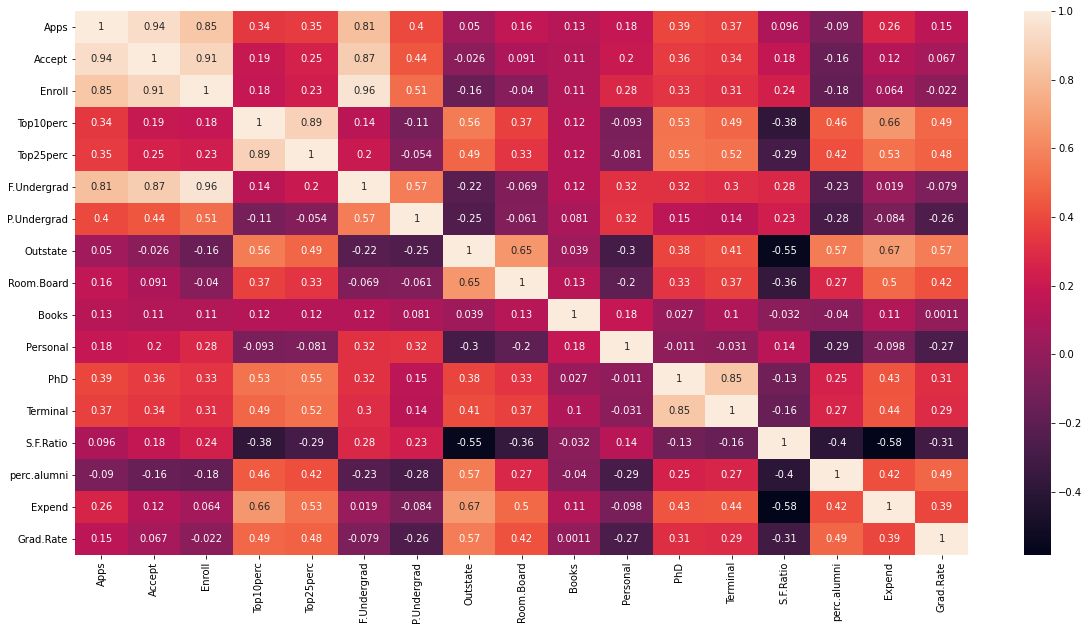

In [18]:
plt.subplots(figsize=(20,10))

sns.heatmap(education_df.corr(), annot=True)

#### 2.2 •	Is scaling necessary for PCA in this case? Give justification and perform scaling.

Yes,Scaling is necessary to normalise the given data.We need to standardise the given data to calculate process the data quicker for performing PCA.

The main objective of scaling or standardization to normalize a data within a particular range. It is a step of
data pre processing which is applied to independent variables or features of data. Another importance of
scaling is it helps in speeding up the calculations in an algorithm.

Before standardizing we need to remove the outliers which are present in the dataset.

In [19]:
print('The dataset has {} rows and {} columns'.format(education_df.shape[0],education_df.shape[1]))


The dataset has 777 rows and 18 columns


Standardization cannot be possible on columns having strings, so we need to remove name column and then apply z score .

In [20]:
# Drop Name column as it is string and PCA doesn't work on string data
education_df1=education_df.drop(['Names'],axis=1)


In [21]:
education_df1.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [22]:
#Standardising before processing PCA

In [22]:
# scale the data using zscore
from scipy.stats import zscore

scaled_df2 = education_df1.apply(zscore)
scaled_df2.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [23]:
scaled_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    float64
 1   Accept       777 non-null    float64
 2   Enroll       777 non-null    float64
 3   Top10perc    777 non-null    float64
 4   Top25perc    777 non-null    float64
 5   F.Undergrad  777 non-null    float64
 6   P.Undergrad  777 non-null    float64
 7   Outstate     777 non-null    float64
 8   Room.Board   777 non-null    float64
 9   Books        777 non-null    float64
 10  Personal     777 non-null    float64
 11  PhD          777 non-null    float64
 12  Terminal     777 non-null    float64
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    float64
 15  Expend       777 non-null    float64
 16  Grad.Rate    777 non-null    float64
dtypes: float64(17)
memory usage: 103.3 KB


In [24]:
no_outlier = ['Top25perc']

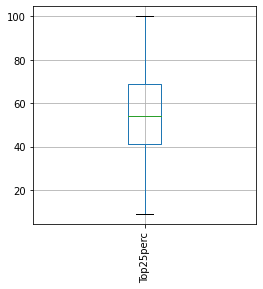

In [25]:
education_df1[no_outlier].boxplot(figsize=(4,4))
plt.xticks(rotation=90)
plt.show()

To treat outliers lets define a function 'treat_outlier'.

For the higher outliers we will treat it to get it at 95 percentile value.

Lower level outliers will be treated to get it at 5 percentile value.

In [26]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [27]:
outlier_list = [x for x in education_df1.columns if x not in no_outlier]

In [28]:
for i in education_df1[outlier_list]:    
    education_df1[i]=treat_outlier(education_df1[i])

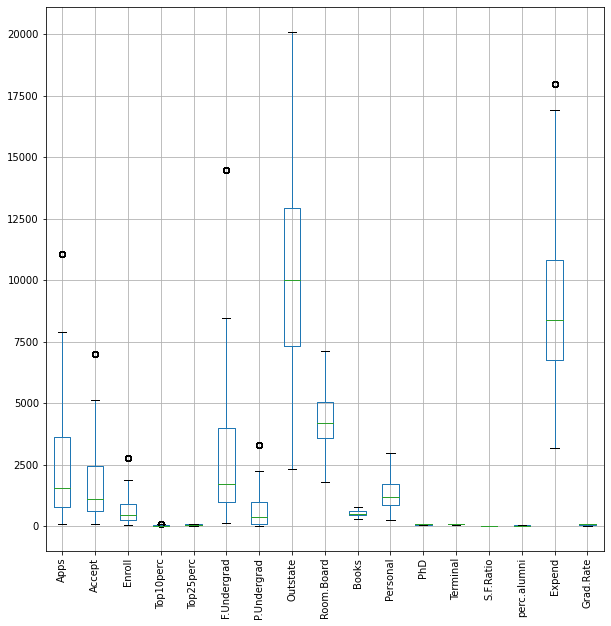

In [29]:
education_df1.boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

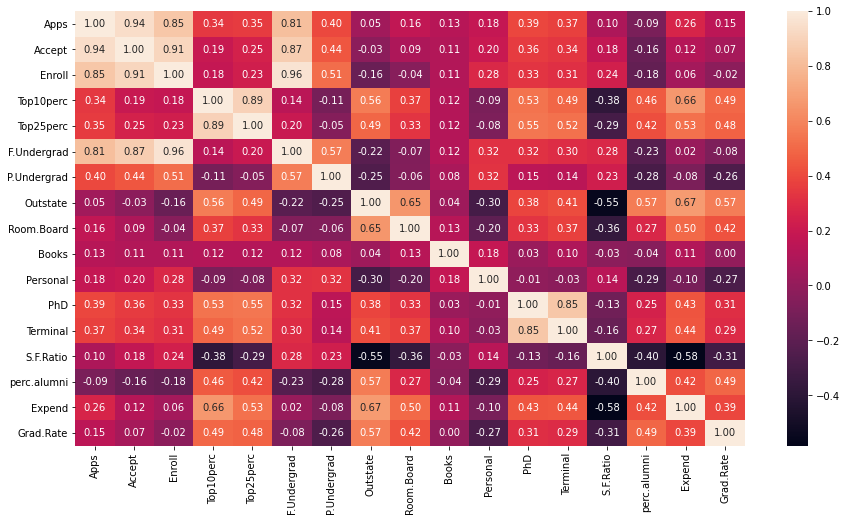

In [30]:
# Check for presence of correlation

plt.figure(figsize=(15,8))
sns.heatmap(scaled_df2.corr(),annot=True, fmt='.2f')

#### 2.3 •	Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

Correlation is a scaled version of covariance; note that the two parameters always have the same sign
(positive, negative, or 0). When the sign is positive, the variables are said to be positively correlated; when the
sign is negative, the variables are said to be negatively correlated; and when the sign is 0, the variables are said
to be uncorrelated.

In simple sense correlation,measures both the strength and direction of the linear relationship between two
variables

Covariance is a measure used to determine how much two variables change in tandem. It indicates the
direction of the linear relationship between variables.

In [31]:
cov_mat = pd.DataFrame.cov(scaled_df2)
cov_mat

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.001289,0.944666,0.847913,0.339270,0.352093,0.815540,0.398777,0.050224,0.165152,0.132729,0.178961,0.391201,0.369968,0.095756,-0.090342,0.259927,0.146944
Accept,0.944666,1.001289,0.912811,0.192695,0.247795,0.875350,0.441839,-0.025788,0.091016,0.113672,0.201248,0.356216,0.338018,0.176456,-0.160196,0.124878,0.067399
Enroll,0.847913,0.912811,1.001289,0.181527,0.227037,0.965883,0.513730,-0.155678,-0.040284,0.112856,0.281291,0.331896,0.308671,0.237577,-0.181027,0.064252,-0.022370
Top10perc,0.339270,0.192695,0.181527,1.001289,0.893144,0.141471,-0.105492,0.563055,0.371959,0.119012,-0.093437,0.532513,0.491768,-0.385370,0.456072,0.661765,0.495627
Top25perc,0.352093,0.247795,0.227037,0.893144,1.001289,0.199702,-0.053646,0.490024,0.331917,0.115676,-0.080914,0.546566,0.525425,-0.295009,0.418403,0.528127,0.477896
F.Undergrad,0.815540,0.875350,0.965883,0.141471,0.199702,1.001289,0.571247,-0.216020,-0.068979,0.115699,0.317608,0.318747,0.300406,0.280064,-0.229758,0.018676,-0.078875
P.Undergrad,0.398777,0.441839,0.513730,-0.105492,-0.053646,0.571247,1.001289,-0.253839,-0.061405,0.081304,0.320294,0.149306,0.142086,0.232830,-0.281154,-0.083676,-0.257332
Outstate,0.050224,-0.025788,-0.155678,0.563055,0.490024,-0.216020,-0.253839,1.001289,0.655100,0.038905,-0.299472,0.383476,0.408509,-0.555536,0.566992,0.673646,0.572026
Room.Board,0.165152,0.091016,-0.040284,0.371959,0.331917,-0.068979,-0.061405,0.655100,1.001289,0.128128,-0.199685,0.329627,0.375022,-0.363095,0.272714,0.502386,0.425489
Books,0.132729,0.113672,0.112856,0.119012,0.115676,0.115699,0.081304,0.038905,0.128128,1.001289,0.179526,0.026940,0.100084,-0.031970,-0.040260,0.112554,0.001062


In [32]:
cov_matrix = np.cov(scaled_df2.T)
cov_matrix

array([[ 1.00128866,  0.94466636,  0.84791332,  0.33927032,  0.35209304,
         0.81554018,  0.3987775 ,  0.05022367,  0.16515151,  0.13272942,
         0.17896117,  0.39120081,  0.36996762,  0.09575627, -0.09034216,
         0.2599265 ,  0.14694372],
       [ 0.94466636,  1.00128866,  0.91281145,  0.19269493,  0.24779465,
         0.87534985,  0.44183938, -0.02578774,  0.09101577,  0.11367165,
         0.20124767,  0.35621633,  0.3380184 ,  0.17645611, -0.16019604,
         0.12487773,  0.06739929],
       [ 0.84791332,  0.91281145,  1.00128866,  0.18152715,  0.2270373 ,
         0.96588274,  0.51372977, -0.1556777 , -0.04028353,  0.11285614,
         0.28129148,  0.33189629,  0.30867133,  0.23757707, -0.18102711,
         0.06425192, -0.02236983],
       [ 0.33927032,  0.19269493,  0.18152715,  1.00128866,  0.89314445,
         0.1414708 , -0.10549205,  0.5630552 ,  0.37195909,  0.1190116 ,
        -0.09343665,  0.53251337,  0.49176793, -0.38537048,  0.45607223,
         0.6617651 

In [33]:
scaled_df2.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


##### Inference : 
    From the above data, we can observe that the Covariance & Correlation matrices values are the same for the variables after scaling. Correlation becomes scaled after deriving covariance ,when the values of the variables are positive they are positively correlated;if they are negative they are negatively correlated. When the values of the variables are zero they are uncorrelated

#### 2.4•	Check the dataset for outliers before and after scaling. What insight do you derive here? 

###  Data Before Scaling

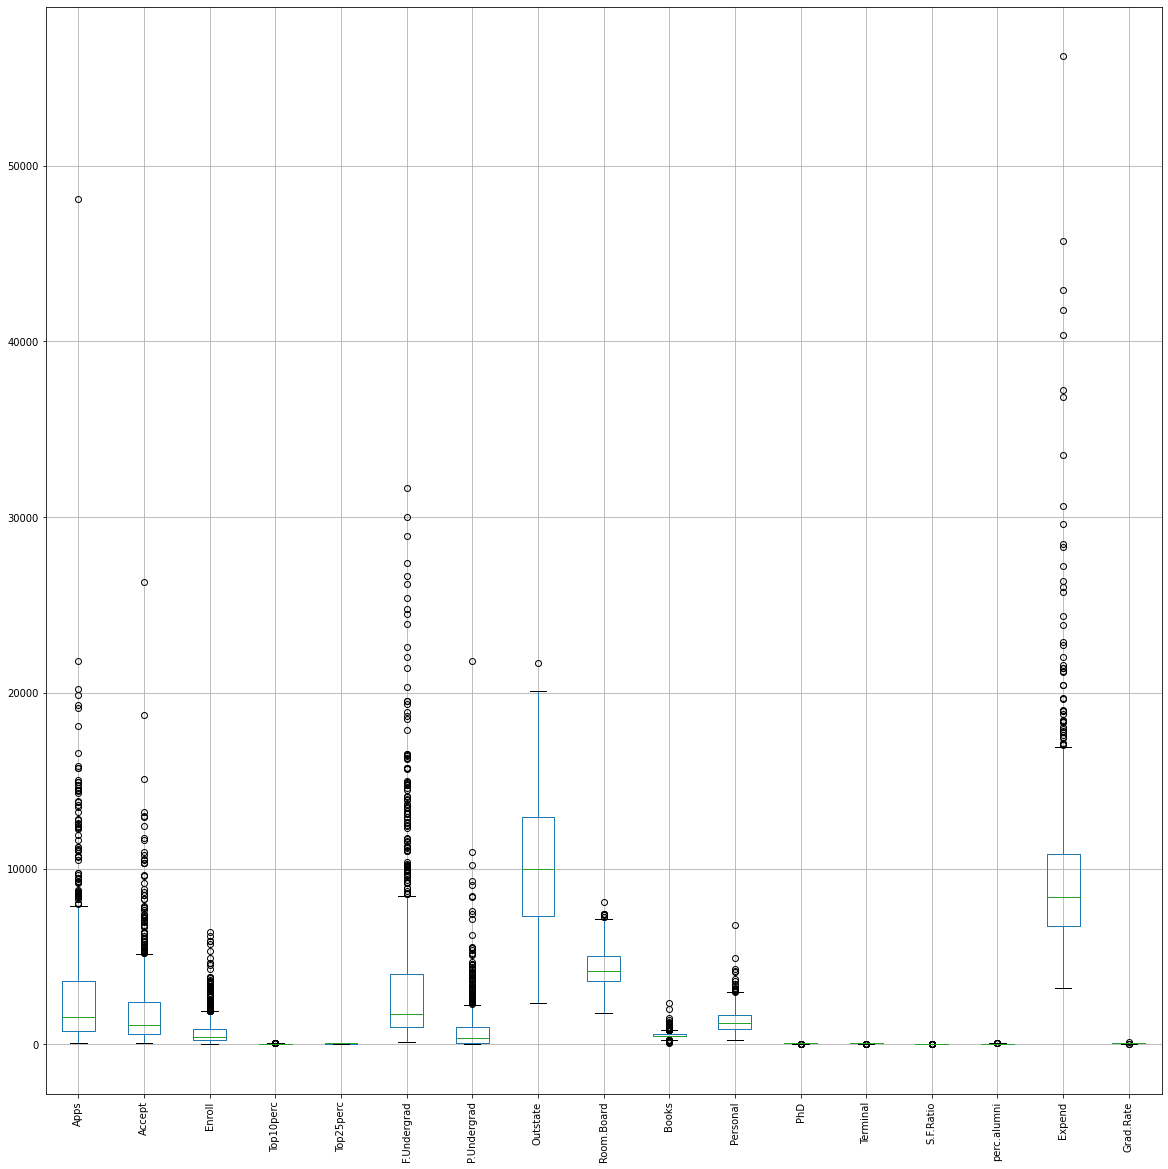

In [35]:
education_df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

##### We can see the presence of Outliers almost in all the columns of the given dataset before Scaling.

### After Scaling

While doing the univariate analysis we have check the outliers using the boxplot after standardzing we are again checking the outliers

In [36]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [43]:
no_outlier = ['Top25perc']

In [44]:
outlier_list = [x for x in education_df1.columns if x not in no_outlier]

In [45]:
for i in education_df1[outlier_list]:    
    education_df1[i]=treat_outlier(education_df1[i])

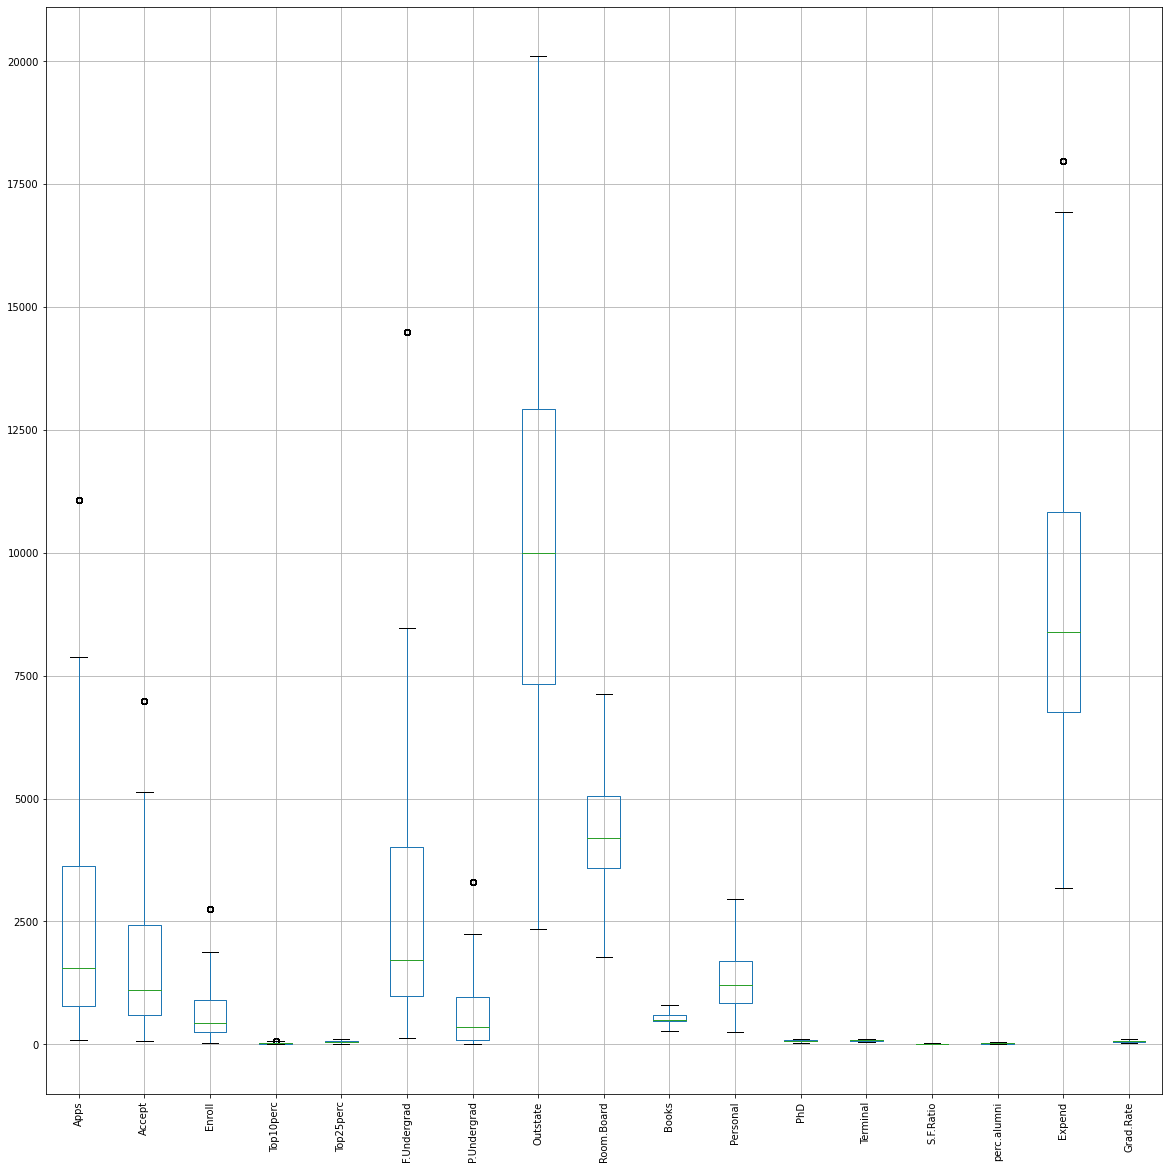

In [46]:
education_df1.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

##### By performing a Univariate Analysis, we can observe the presence of one or two outliers with the help of a boxplot even after standardization. By removing the outliers & through performing Scaling we were able to preprocess and normalize the data to perform PCA.

### 2.5  •	Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]

Eigenvalue and Eigenmatrix are mainly used to capture key information that stored in a large matrix. 

1. It provides summary of large matrix.

2. Performing computation on large matrix is slow and require more memory and CPU, eigenvectors and
eigenvalues can improve the efficiency in computationally intensive task by reducing dimensions after
ensuring of the key information is maintained.

In [47]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

print('\n Eigen Values \n ', eigen_values)
print('\n Eigen Vectors \n ', eigen_vectors)


 Eigen Values 
  [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]

 Eigen Vectors 
  [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.939

### Using PCA

In [49]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=7, random_state=123)
pca_transformed = pca.fit_transform(scaled_df2)

In [50]:
# Alternate Method

#Extract eigen vectors

pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [51]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 ])

##### The Eigen Values & Eigen Vectors were extracted using np.linalg.eig(cov_matrix) function. By extracting Eigen Values & Vectors the efficiency of performing a PCA is improved where it  reduces the dimensions of the data.

Also we can use pca.explained_variance_ for extracting eigen values and pca.components_ for extracting eigen vectors.


### 2.6 •	Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

##### Statistical Test needs to be done before performing PCA

In [59]:
# Barlett Test

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_df2)
p_value

0.0

In [60]:
# KMO

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_df2)
kmo_model

0.8131251200373505

In [ ]:
# Using PCA command from sklearn and find Principal Components

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
data_reduced = pca.fit_transform(scaled_df2)
data_reduced.T

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [-7.43975398e-01,  1.05999660e+00, -3.69613274e-01, ...,
        -5.16021118e-01, -9.47754745e-01, -1.13217594e+00],
       [-2.98306081e-01, -1.77137309e-01, -9.60591689e-01, ...,
         4.68014248e-01, -2.06993738e+00,  8.39893087e-01],
       [ 6.38443468e-01,  2.36753302e-01, -2.48276091e-01, ...,
        -1.31749158e+00,  8.33276555e-02,  1.30731260e+00]])

In [53]:
#Extract eigen vectors

pca.components_


array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [54]:
#Check the eigen values
#Note: This is always returned in descending order

eigen_values = pca.explained_variance_

print("Eigen Values are : \n",eigen_values)

Eigen Values are : 
 [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878 ]


In [55]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)

pca.explained_variance_ratio_


array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871])

In [57]:
# var = np.cumsum(pca.explained_variance_ratio_)
var = np.cumsum(np.round(pca.explained_variance_ratio_,4))*100
print(var)

[32.02 58.36 65.26 71.18 76.67 81.65 85.21]


In [61]:
df_pca = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7'],
                                    index = scaled_df2.columns)

In [62]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692


In [63]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)


array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726])

In [64]:
#Choose the PCs basis cumulative explained variance
df_selected = df_pca[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6','PC7']]


In [65]:
#Check the selected PCs
df_selected


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692


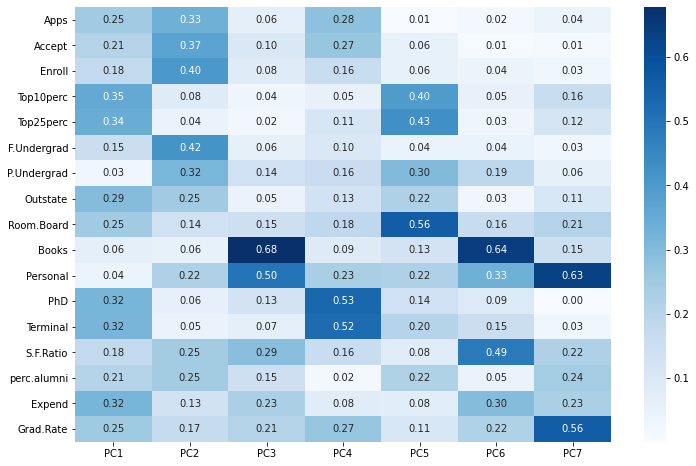

In [66]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');


In [67]:
#In order to calculate PC scores we need loadings, below:
df_selected


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692


In [68]:
#...and we need the original scaled features
scaled_df2.iloc[0]


Apps          -0.346882
Accept        -0.321205
Enroll        -0.063509
Top10perc     -0.258583
Top25perc     -0.191827
F.Undergrad   -0.168116
P.Undergrad   -0.209207
Outstate      -0.746356
Room.Board    -0.964905
Books         -0.602312
Personal       1.270045
PhD           -0.163028
Terminal      -0.115729
S.F.Ratio      1.013776
perc.alumni   -0.867574
Expend        -0.501910
Grad.Rate     -0.318252
Name: 0, dtype: float64

In [69]:
#We need to perform a dot product to obtain the scores
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], scaled_df2.iloc[0])
    print(round(pc_score, 6), end = ' ')


-1.592855 0.767334 -0.101074 -0.921749 -0.743975 -0.298306 0.638443 

In [70]:

#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=7, random_state=123)
pca_final = pca.fit_transform(scaled_df2)


In [71]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.592855,0.767334,-0.101074,-0.921749,-0.743975,-0.298306,0.638443
1,-2.192402,-0.578830,2.278798,3.588918,1.059997,-0.177137,0.236753
2,-1.430964,-1.092819,-0.438093,0.677241,-0.369613,-0.960592,-0.248276
3,2.855557,-2.630612,0.141722,-1.295486,-0.183837,-1.059508,-1.249356
4,-2.212008,0.021631,2.387030,-1.114538,0.684451,0.004918,-2.159220
5,-0.571665,-1.496325,0.024354,0.066944,-0.376261,-0.668344,-1.609835
6,0.241952,-1.506368,0.234194,-1.142024,1.546983,-0.009995,0.590933
7,1.750474,-1.461412,-1.026589,-0.981184,0.217044,0.222924,0.038169
8,0.769127,-1.984433,-1.426052,-0.071424,0.586380,-0.655179,-0.213314
9,-2.770721,-0.844611,1.627987,1.705091,-1.019826,-0.794401,-0.317891


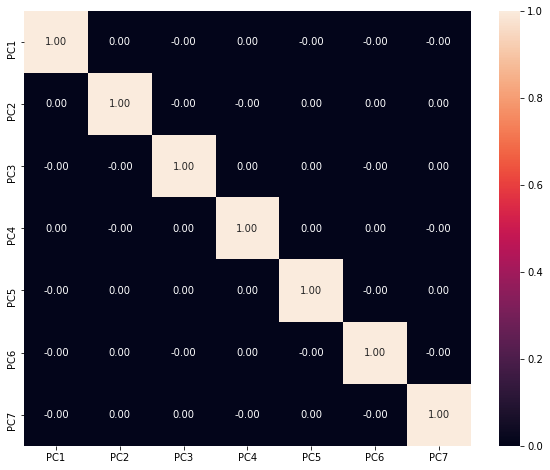

In [72]:
#Check for presence of correlations among the PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');


##### Correlaton between Components and Features

In [81]:
df_comp = pd.DataFrame(pca.components_, columns = list(scaled_df2))
df_comp.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
1,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
2,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
3,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
4,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268


In [82]:
# df_comp = pd.DataFrame(pca.components_,columns=list(scaled_df2))
df_comp.shape

(7, 17)

<AxesSubplot:>

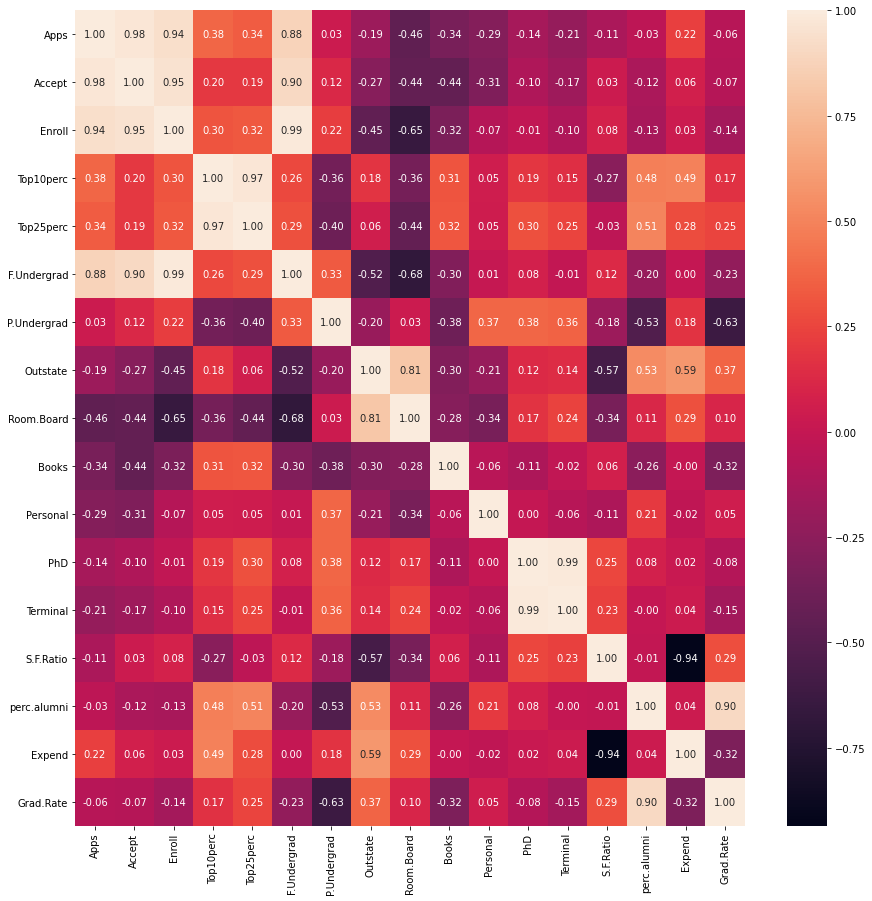

In [84]:
plt.figure(figsize=(15,15))
# sns.heatmap(df_comp, cmap = 'plasma', annot= True)
sns.heatmap(df_comp.corr(), annot= True, fmt='.2f')

The Cumulative % gives the percentage of variance accounted for by the n components. For example, the
cumulative percentage for the second component is the sum of the percentage of variance for the first and
second components. It helps in deciding the number of components by selecting the components which
explained the high variance

In the above array we see that the first feature explains 32% of the variance within our data set while the
first two explain 62.1 and so on. If we employ 7 features we capture ~ 87.6% of the variance within the
dataset.

Text(0.5, 0, 'PC')

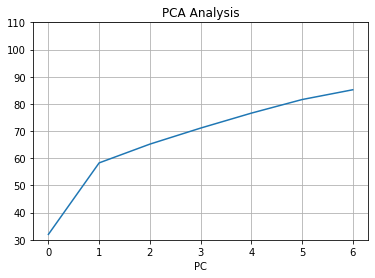

In [86]:
plt.title('PCA Analysis')
plt.ylim(30,110)
plt.plot(var)
plt.grid()

#plt.ylabel('% Var Explained')
plt.xlabel('PC')

#### 2.7 •	Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

Explicit form of first PC

Eigen Vectors for the first PC

In [87]:
eigen_vector_1 = eigen_vectors[0]
print("Eigen Vector for the first PC is :: \n", eigen_vector_1)

Eigen Vector for the first PC is :: 
 [-0.2487656   0.33159823  0.0630921  -0.28131053  0.00574141  0.01623744
  0.04248635  0.1030904   0.09022708 -0.0525098   0.3589704  -0.4591395
  0.04304621 -0.13340581  0.0806328  -0.59583097  0.02407091]


In [89]:
# Eigen Vectors for the first PC upto 2 decimal place

np.round(eigen_vector_1,4)*100


array([-24.88,  33.16,   6.31, -28.13,   0.57,   1.62,   4.25,  10.31,
         9.02,  -5.25,  35.9 , -45.91,   4.3 , -13.34,   8.06, -59.58,
         2.41])

If we sort the eigenvectors in descending order with respect to their eigenvalues, we will have that
the first eigenvector accounts for the largest spread among data, the second one for the second
largest spread and so on. 

### 2.8 •	Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

From cumulative values of the eigenvalues, we can see that around 7
principal components explained over 90% of the variance. Thus, the optimum number of principal
components can be 7. 

In [73]:
tot = sum(eigen_values)
var_exp = [i / tot *100 for i in sorted(eigen_values, reverse= True)]
var_exp

[37.575520339276295,
 30.909676635263445,
 8.098077549646353,
 6.950500803205403,
 6.440525669066857,
 5.849439646839829,
 4.176259356701801]

In [74]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained : ", cum_var_exp)

Cumulative Variance Explained :  [ 37.57552034  68.48519697  76.58327452  83.53377533  89.974301
  95.82374064 100.        ]


Scree plot: A scree plot helps the analyst visualize the relative importance of the factors, a sharp drop in
the plot signals that subsequent factors are ignorable

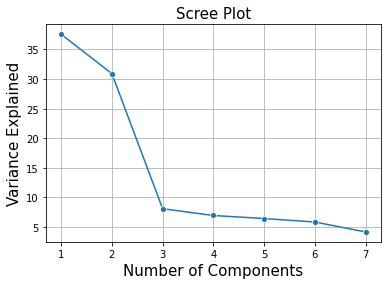

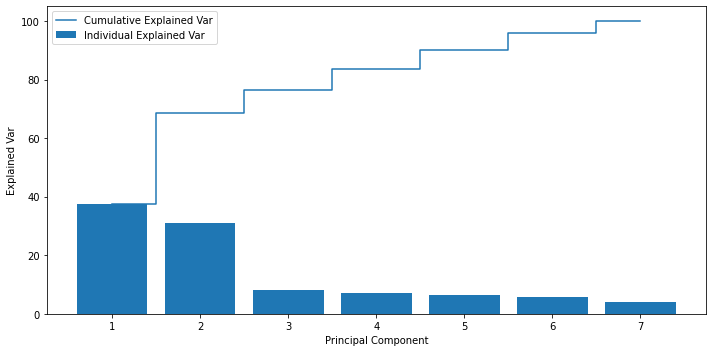

In [83]:
# Scree Plot or Albow Plot 

# plt.plot(var_exp)
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.bar(range(1,eigen_values.size+1), var_exp, align='center', label='Individual Explained Var')
plt.step(range(1,eigen_values.size+1), cum_var_exp, where='mid', label='Cumulative Explained Var')
plt.ylabel('Explained Var')
plt.xlabel('Principal Component')
plt.legend(loc='best')
plt.tight_layout()


### 2.9 •	Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

1. PCA is a statistical technique and uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. PCA also is a tool to reduce multidimensional data to lower dimensions while retaining most of the information.By reducing, the dimensionality of the data ,variation is kept as much as possible.

2. By transforming the data into a continuous variable PCA was performed.

3. From the given Dataset the first feature captures about 33.3% of the variance ,while the first two captures 62.1% variance; goin on until 7 features which captures about 87.6% of variance within the dataset.


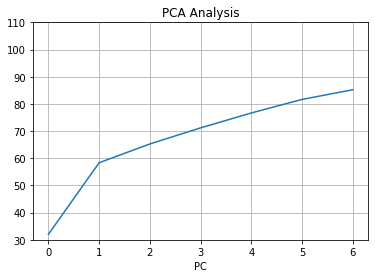

In [85]:
plt.title('PCA Analysis')
plt.ylim(30,110)
plt.plot(var)

#plt.ylabel('% Var Explained')
plt.xlabel('PC')
plt.grid()

4. From 18 variables in the dataset , we have reduced to 7 components with the help of PCA which captures about 87.6% variance in the given dataset